In [1]:
cd ..

e:\GitHub\ppgc-uff-machine-learning


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data_folder = 'data'


In [4]:
occ = pd.read_csv(f"{data_folder}/Occupancy_Estimation.csv")

In [5]:
print(occ.info())
occ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:
occ.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [7]:
target_variable = "Room_Occupancy_Count"

In [8]:
occ = occ.drop(['Date','Time'], axis=1)
occ.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


data visualization

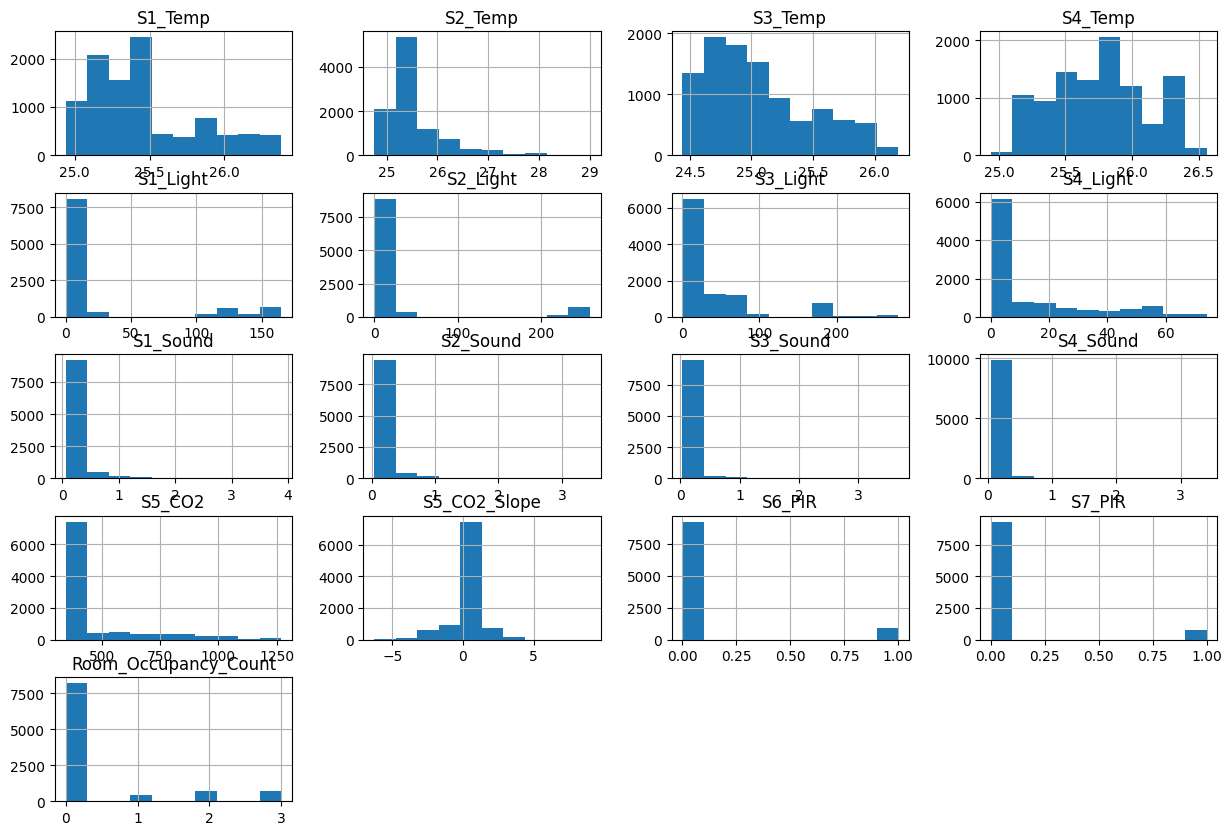

<Figure size 640x480 with 0 Axes>

In [9]:
occ.hist(figsize=(15,10), layout=(5,4))
_ = plt.figure()

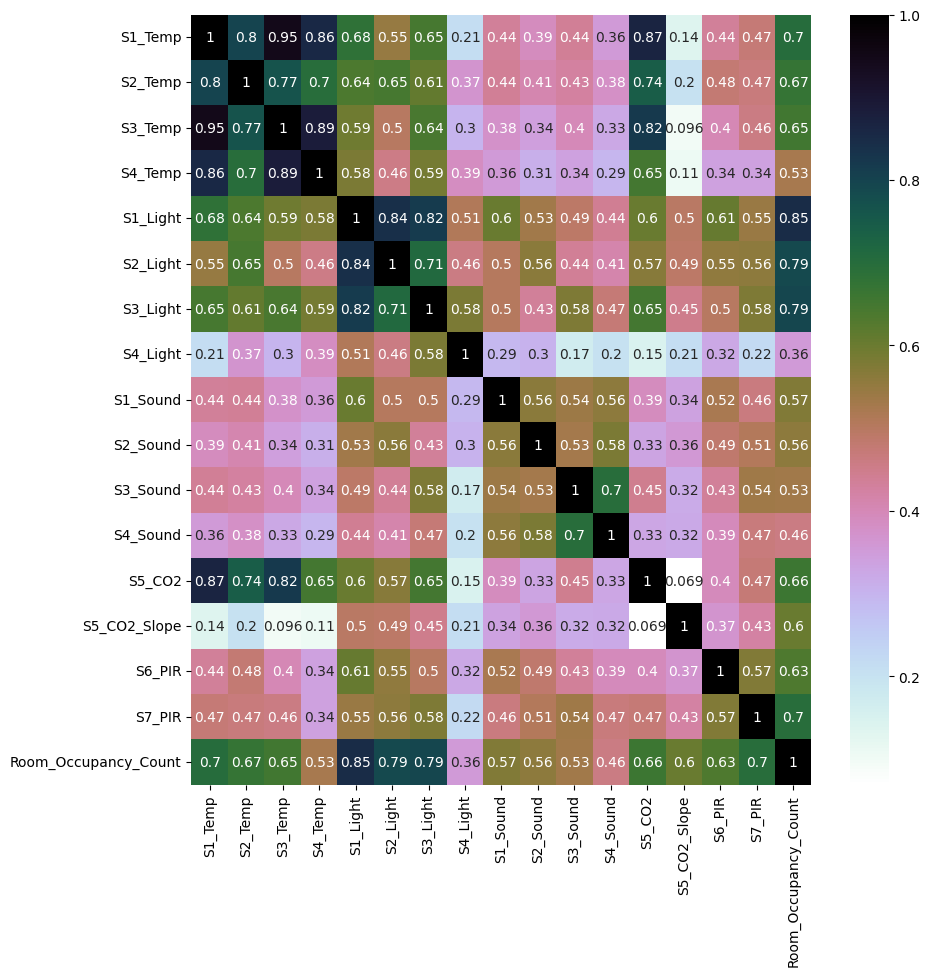

In [10]:
plt.figure(figsize=(10,10)) 
sns.heatmap(occ.corr(),annot=True,cmap='cubehelix_r')

plt.show()

Room_Occupancy_Count has a stronger correlation with the first three light sensors, the first temperature sensor and the second motion detection sensor.

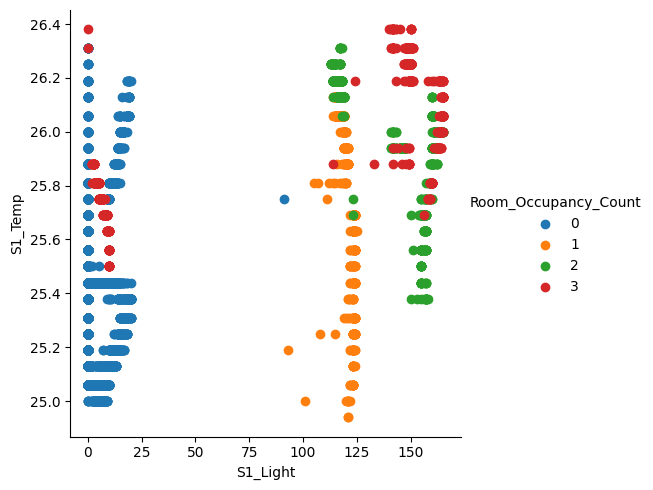

In [11]:
sns.FacetGrid(occ, hue=target_variable, height=5) \
   .map(plt.scatter, "S1_Light", "S1_Temp") \
   .add_legend()

plt.show()

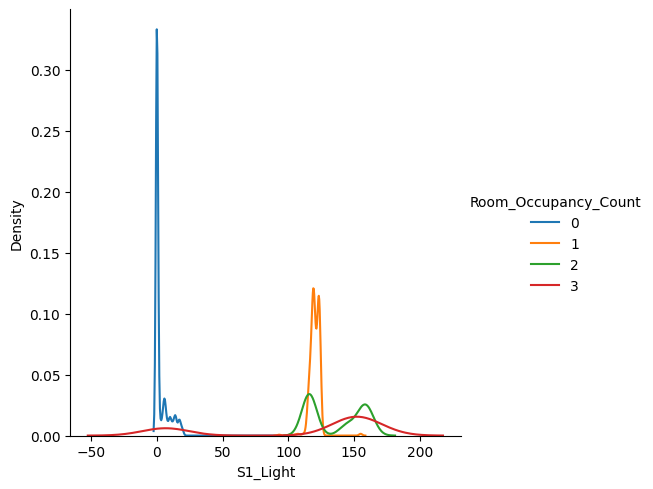

In [12]:
sns.FacetGrid(occ, hue=target_variable, height=5).map(sns.kdeplot, "S1_Light").add_legend()
plt.show()

In [13]:
sel_col = ['S1_Light','S2_Light','S3_Light','S1_Temp','S7_PIR']

In [14]:
column_data = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

## PCA

#1 Principal Component explained variance rate: 0.871141363410997
#2 Principal Component explained variance rate: 0.09556861993905472
#3 Principal Component explained variance rate: 0.021832364397293785
#4 Principal Component explained variance rate: 0.0075154093936855085
#5 Principal Component explained variance rate: 0.0039163927332601725
#6 Principal Component explained variance rate: 1.4664979941482539e-05


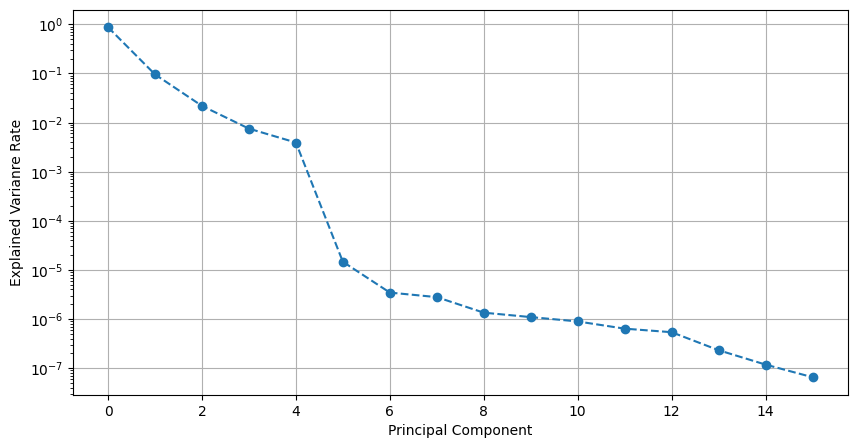

In [15]:
from sklearn.decomposition import PCA

pca_trafo = PCA().fit(occ[column_data])

plt.figure(figsize=(10,5))
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o') # y axis in logharitmic scale
plt.ylabel('Explained Varianre Rate')
plt.xlabel('Principal Component')
plt.grid()

for i in range(0,6):
    print(f'#{i+1} Principal Component explained variance rate:', pca_trafo.explained_variance_ratio_[i])

without normalazing the data, one component explains almost 90% of data variance, it looks like normalizing it is necessary

Normalizing the data

In [16]:
norm_occ = (occ[column_data] - occ[column_data].min())/(occ[column_data].max() - occ[column_data].min())
norm_occ[target_variable] = occ[target_variable]

#1 Principal Component explained variance rate: 0.5883465300248613
#2 Principal Component explained variance rate: 0.12553464255183422
#3 Principal Component explained variance rate: 0.09272303322493632
#4 Principal Component explained variance rate: 0.0530136356763759
#5 Principal Component explained variance rate: 0.04714380877696437
#6 Principal Component explained variance rate: 0.02178577813907173


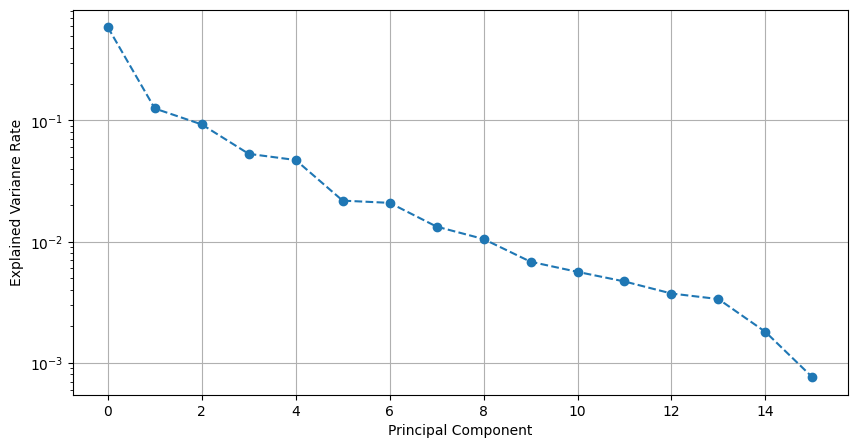

In [17]:
from sklearn.decomposition import PCA

pca_trafo = PCA().fit(norm_occ[column_data])

plt.figure(figsize=(10,5))
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o') # y axis in logharitmic scale
plt.ylabel('Explained Varianre Rate')
plt.xlabel('Principal Component')
plt.grid()

for i in range(0,6):
    print(f'#{i+1} Principal Component explained variance rate:', pca_trafo.explained_variance_ratio_[i])

In [18]:
exp_var_ratio = pca_trafo.explained_variance_ratio_
cum_exp_var   = exp_var_ratio.cumsum()

n_pcs = np.sum(cum_exp_var < .95)

print(f'{n_pcs} PCs are needed to explain {round(100*cum_exp_var[n_pcs],2)}% of the data variance')

7 PCs are needed to explain 96.27% of the data variance


In [19]:
def feat_select_idx_pca(pcs, n_feats):
    # each coefficient mean for each PC
    mcoefs = np.mean(pcs, axis=0)   
    return np.argpartition(mcoefs, -n_feats)[-n_feats:]

In [20]:
idx = feat_select_idx_pca(pca_trafo.components_[:n_pcs], 5)
idx.sort()

retained_features = [occ.columns[i] for i in idx]
print('Original features:', list(norm_occ.columns.values))
print('Kept features:', retained_features)

Original features: ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']
Kept features: ['S4_Temp', 'S1_Light', 'S3_Sound', 'S6_PIR', 'S7_PIR']


## Variable processing for classification

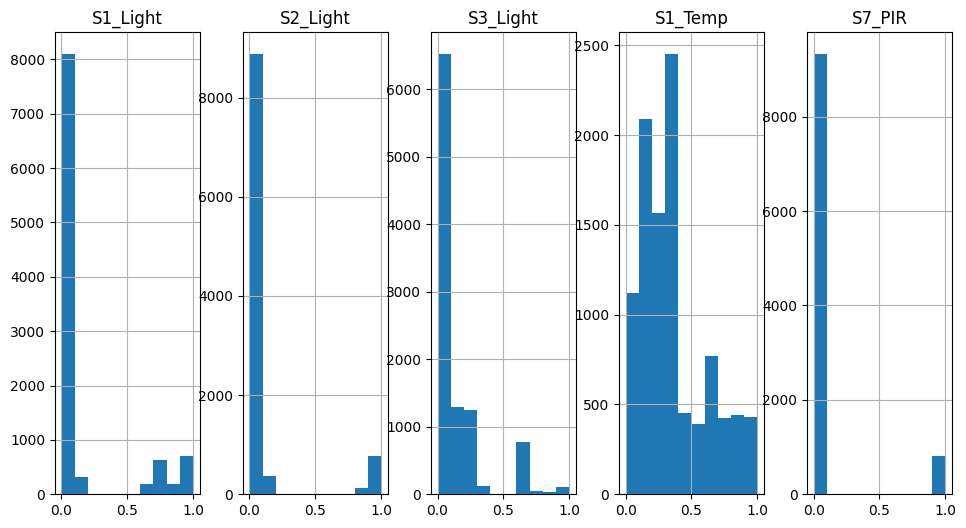

In [21]:
norm_occ[sel_col].hist(figsize=(14,6), layout=(1,6))
plt.show()

The selected columns will be each cut into a different number of bins for categorization purposes:

S1_Light: 6

S2_Light: 4

S3_Light: 4 or 8

S1_Temp: 5 or 10

S7_PIR: keep as it is

In [22]:
norm_occ['s1l_bins'] = pd.cut(norm_occ.S1_Light, include_lowest=True, bins=[0.0,0.1,0.2,0.6,0.7,0.8,0.9,1])
norm_occ['s2l_bins'] = pd.cut(norm_occ.S2_Light, include_lowest=True, bins=[0.0,0.1,0.2,0.8,0.9,1])
norm_occ['s3l_bins'] = pd.cut(norm_occ.S3_Light, include_lowest=True, bins=[0.0,0.2,0.4,0.6,0.8,1])
norm_occ['s1t_bins'] = pd.cut(norm_occ.S1_Temp, include_lowest=True, bins=[0.0,0.2,0.4,0.6,0.8,1])
norm_occ['s7p_bins'] = pd.cut(norm_occ.S7_PIR, include_lowest=True, bins=[0.0,0.5,1])
norm_occ.info()
norm_occ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   S1_Temp               10129 non-null  float64 
 1   S2_Temp               10129 non-null  float64 
 2   S3_Temp               10129 non-null  float64 
 3   S4_Temp               10129 non-null  float64 
 4   S1_Light              10129 non-null  float64 
 5   S2_Light              10129 non-null  float64 
 6   S3_Light              10129 non-null  float64 
 7   S4_Light              10129 non-null  float64 
 8   S1_Sound              10129 non-null  float64 
 9   S2_Sound              10129 non-null  float64 
 10  S3_Sound              10129 non-null  float64 
 11  S4_Sound              10129 non-null  float64 
 12  S5_CO2                10129 non-null  float64 
 13  S5_CO2_Slope          10129 non-null  float64 
 14  S6_PIR                10129 non-null  float64 
 15  S7

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,s1l_bins,s2l_bins,s3l_bins,s1t_bins,s7p_bins
0,0.000000,0.0,0.068571,0.271605,0.733333,0.131783,0.189286,0.540541,0.005236,0.044118,...,0.048649,0.462487,0.0,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
1,0.000000,0.0,0.068571,0.308642,0.733333,0.127907,0.189286,0.540541,0.227749,0.002941,...,0.048649,0.454431,0.0,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
2,0.041667,0.0,0.034286,0.308642,0.733333,0.131783,0.189286,0.540541,0.096859,0.020588,...,0.048649,0.446123,0.0,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
3,0.041667,0.0,0.068571,0.308642,0.733333,0.131783,0.189286,0.540541,0.091623,0.017647,...,0.048649,0.437563,0.0,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"
4,0.041667,0.0,0.068571,0.308642,0.733333,0.131783,0.192857,0.540541,0.031414,0.005882,...,0.048649,0.428751,0.0,0.0,1,"(0.7, 0.8]","(0.1, 0.2]","(-0.001, 0.2]","(-0.001, 0.2]","(-0.001, 0.5]"


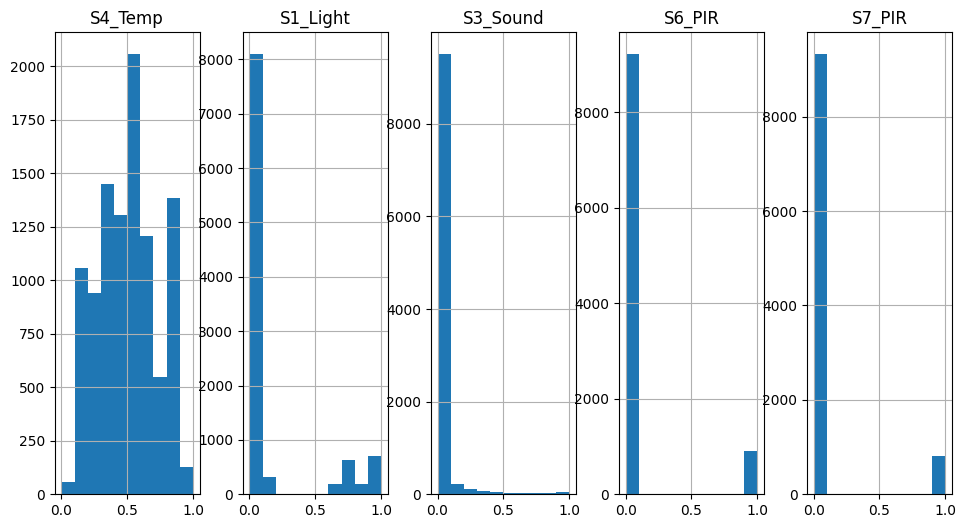

In [23]:
pca_columns = retained_features
norm_occ[pca_columns].hist(figsize=(14,6), layout=(1,6))
plt.show()

In [24]:
norm_occ['s4t_bins'] = pd.cut(norm_occ.S4_Temp, include_lowest=True, bins=[0.0,0.2,0.4,0.6,0.8,1])
norm_occ['s3s_bins'] = pd.cut(norm_occ.S3_Sound, include_lowest=True, bins=[0.0,0.1,0.2,0.4,0.6,0.8,1])
norm_occ['s6p_bins'] = pd.cut(norm_occ.S6_PIR, include_lowest=True, bins=[0.0,0.5,1])


In [25]:
hist_bins = ['s1l_bins','s2l_bins','s3l_bins','s1t_bins','s7p_bins']
fact_columns = []
for col in hist_bins:
    label, val = pd.factorize(norm_occ[col])
    fact_columns.append(col+'_fact')
    norm_occ[col+'_fact'] = label

In [26]:
pca_bins = ['s4t_bins','s1l_bins','s3s_bins','s6p_bins','s7p_bins']
fact_pca = []
for col in pca_bins:
    label, val = pd.factorize(norm_occ[col])
    fact_pca.append(col+'_fact')
    norm_occ[col+'_fact'] = label

### Splitting the data between numerical e categorical in both the selected columns from the histogram and the pca relevant columns

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

Histogram columns

In [50]:
seed = 13
train_test_columns = sel_col

# numerical data set
num_X_train, num_X_test, num_y_train, num_y_test = train_test_split(norm_occ[train_test_columns], norm_occ[target_variable], random_state=seed, test_size=0.25, stratify=norm_occ[target_variable])
print("Train set X", num_X_train.shape)
print("Train set y", num_y_train.shape)
print("Test set X", num_X_test.shape)
print("Test set y", num_y_test.shape)

Train set X (7596, 5)
Train set y (7596,)
Test set X (2533, 5)
Test set y (2533,)


In [29]:
train_test_columns = fact_columns
# categorical dataset
cat_X_train, cat_X_test, cat_y_train, cat_y_test = train_test_split(norm_occ[train_test_columns], norm_occ[target_variable], random_state=seed, test_size=0.25, stratify=norm_occ[target_variable])
print("Test set X", cat_X_test.shape)
print("Test set y", cat_y_test.shape)

Test set X (2533, 5)
Test set y (2533,)


Baseline accuracy

In [54]:
baseline_hist = accuracy_score(num_y_test, np.zeros_like(num_y_test))
baseline_hist_cat = accuracy_score(cat_y_test, np.zeros_like(cat_y_test))
print(f"Baseline accuracy for numeric histogram values = {baseline_hist}")
print(f"Baseline accuracy for categoric histogram values = {baseline_hist_cat}")

Baseline accuracy for numeric histogram values = 0.8124753257007501
Baseline accuracy for categoric histogram values = 0.8124753257007501


PCA columns

In [49]:
seed = 13
train_test_columns = pca_columns
# numerical data set
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(norm_occ[train_test_columns], norm_occ[target_variable], random_state=seed, test_size=0.25, stratify=norm_occ[target_variable])
print("Train set X", pca_X_train.shape)
print("Train set y", pca_y_train.shape)
print("Test set X", pca_X_test.shape)
print("Test set y", pca_y_test.shape)

Train set X (7596, 5)
Train set y (7596,)
Test set X (2533, 5)
Test set y (2533,)


In [31]:
train_test_columns = fact_pca
# numerical data set
pca_fact_X_train, pca_fact_X_test, pca_fact_y_train, pca_fact_y_test = train_test_split(norm_occ[train_test_columns], norm_occ[target_variable], random_state=seed, test_size=0.25, stratify=norm_occ[target_variable])
print("Test set X", pca_fact_X_test.shape)
print("Test set y", pca_fact_y_test.shape)

Test set X (2533, 5)
Test set y (2533,)


In [55]:
baseline_pca = accuracy_score(pca_y_test, np.zeros_like(pca_y_test))
baseline_pca_cat = accuracy_score(pca_fact_y_test, np.zeros_like(pca_fact_y_test))
print(f"Baseline accuracy for numeric histogram values = {baseline_pca}")
print(f"Baseline accuracy for categoric histogram values = {baseline_pca_cat}")

Baseline accuracy for numeric histogram values = 0.8124753257007501
Baseline accuracy for categoric histogram values = 0.8124753257007501


In [51]:
def do_and_print_gridsearch(model, params, skf, X_train, y_train, scoring='accuracy'):
    gs = GridSearchCV(model, param_grid=params, return_train_score=True, scoring=scoring, cv=skf.split(num_X_train, num_y_train))
    gs.fit(X_train, y_train)

    print('Best Hyperparameters:')
    print(gs.best_params_)

    cv_results = pd.DataFrame(gs.cv_results_)
    print("Average Score on train set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                        cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
    print("Average Score on validation set: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                        cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))
    return gs

In [33]:
def fit_predict_and_print(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Train set accuracy: {:.3f}".format(model.score(X_train, y_train)))
    print("Validation set accuracy: {:.3f}".format(model.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

### k-NN

Training on histogram columns

In [34]:
from sklearn.neighbors import KNeighborsClassifier

params = {  'n_neighbors': [x for x in range(5,31)],
            'weights': ['uniform','distance'],
            'p': [1,2]}

knn = KNeighborsClassifier(n_jobs=8)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
grid_search = do_and_print_gridsearch(knn, params, skf, num_X_train, num_y_train)

Best Hyperparameters:
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Average Score on train set: 1.000 +/- 0.000
Average Score on validation set: 0.996 +/- 0.002


In [35]:
knn_best = KNeighborsClassifier(    n_jobs=8,
                                    n_neighbors=grid_search.best_params_['n_neighbors'],
                                    weights=grid_search.best_params_['weights'],
                                    p=grid_search.best_params_['p'])

fit_predict_and_print(knn_best, num_X_train, num_y_train, num_X_test, num_y_test)

Train set accuracy: 0.999
Validation set accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.98      1.00      0.99       115
           2       0.97      0.96      0.97       187
           3       0.97      0.97      0.97       173

    accuracy                           1.00      2533
   macro avg       0.98      0.98      0.98      2533
weighted avg       1.00      1.00      1.00      2533

[[2058    0    0    0]
 [   0  115    0    0]
 [   0    2  180    5]
 [   0    0    5  168]]
Accuracy: 0.995


Training on PCA columns

In [36]:
params = {  'n_neighbors': [x for x in range(5,31)],
            'weights': ['uniform','distance'],
            'p': [1,2]}

knn = KNeighborsClassifier(n_jobs=8)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
grid_search_knn_pca = do_and_print_gridsearch(knn, params, skf, pca_X_train, pca_y_train)

Best Hyperparameters:
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Average Score on train set: 0.999 +/- 0.000
Average Score on validation set: 0.983 +/- 0.002


In [37]:
knn_best = KNeighborsClassifier(    n_jobs=8,
                                    n_neighbors=grid_search_knn_pca.best_params_['n_neighbors'],
                                    weights=grid_search_knn_pca.best_params_['weights'],
                                    p=grid_search_knn_pca.best_params_['p'])

fit_predict_and_print(knn_best, pca_X_train, pca_y_train, pca_X_test, pca_y_test)

Train set accuracy: 0.999
Validation set accuracy: 0.988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.95      0.94      0.94       115
           2       0.92      0.94      0.93       187
           3       0.95      0.94      0.95       173

    accuracy                           0.99      2533
   macro avg       0.96      0.96      0.96      2533
weighted avg       0.99      0.99      0.99      2533

[[2055    0    0    3]
 [   0  108    7    0]
 [   0    6  176    5]
 [   2    0    8  163]]
Accuracy: 0.988


### Decision Tree

Histogram features

In [38]:
from sklearn.tree import DecisionTreeClassifier

params = {  'criterion': ['entropy'],
            'max_depth': [x for x in range(2,6)],
            'min_samples_split': [x for x in range(2,8)],
            'min_samples_leaf': [x for x in range(1,8)]}

tree_fact = DecisionTreeClassifier(random_state=seed)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
grid_search_tree = do_and_print_gridsearch(tree_fact, params, skf, cat_X_train, cat_y_train)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Average Score on train set: 0.989 +/- 0.000
Average Score on validation set: 0.988 +/- 0.002


In [39]:
tree_best = DecisionTreeClassifier( random_state=seed,
                                    max_depth=grid_search_tree.best_params_['max_depth'],
                                    min_samples_split=grid_search_tree.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search_tree.best_params_['min_samples_leaf'])
print("Histogram features")
fit_predict_and_print(tree_best, cat_X_train, cat_y_train, cat_X_test, cat_y_test)


Histogram features
Train set accuracy: 0.989
Validation set accuracy: 0.992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00       115
           2       0.99      0.95      0.97       187
           3       0.95      0.94      0.94       173

    accuracy                           0.99      2533
   macro avg       0.98      0.97      0.98      2533
weighted avg       0.99      0.99      0.99      2533

[[2058    0    0    0]
 [   0  115    0    0]
 [   0    0  178    9]
 [  10    0    1  162]]
Accuracy: 0.992


PCA features

In [40]:
params = {  'criterion': ['entropy'],
            'max_depth': [x for x in range(2,6)],
            'min_samples_split': [x for x in range(2,8)],
            'min_samples_leaf': [x for x in range(1,8)]}

tree_fact = DecisionTreeClassifier(random_state=seed)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
grid_search_tree_pca = do_and_print_gridsearch(tree_fact, params, skf, pca_fact_X_train, pca_fact_y_train)

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Average Score on train set: 0.971 +/- 0.001
Average Score on validation set: 0.969 +/- 0.003


In [41]:

tree_best = DecisionTreeClassifier( random_state=seed,
                                    max_depth=grid_search_tree_pca.best_params_['max_depth'],
                                    min_samples_split=grid_search_tree_pca.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search_tree_pca.best_params_['min_samples_leaf'])
print("\nPCA features")
fit_predict_and_print(tree_best, pca_fact_X_train, pca_fact_y_train, pca_fact_X_test, pca_fact_y_test)


PCA features
Train set accuracy: 0.971
Validation set accuracy: 0.978
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.91      0.93      0.92       115
           2       0.92      0.80      0.86       187
           3       0.85      0.95      0.90       173

    accuracy                           0.98      2533
   macro avg       0.92      0.92      0.92      2533
weighted avg       0.98      0.98      0.98      2533

[[2057    0    0    1]
 [   0  107    8    0]
 [   0   10  150   27]
 [   4    0    5  164]]
Accuracy: 0.978


## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for fold, (train_idx, val_idx) in enumerate(skf.split(num_X_train, num_y_train)):
    X_train = num_X_train.iloc[train_idx]
    y_train = num_y_train.iloc[train_idx]
    
    X_val = num_X_train.iloc[val_idx]
    y_val = num_y_train.iloc[val_idx]
    
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    y_pred = nb.predict(X_val)
    pred_proba = nb.predict_proba(X_val)[:,1]
    acc_score = accuracy_score(y_val, y_pred)
    print(f"=========== Fold {fold} ===========")
    print(f"Accuracy on validation set = {acc_score:0.3f}")

=========== Fold 0 ===========
Accuracy on validation set = 0.938
=========== Fold 1 ===========
Accuracy on validation set = 0.946
=========== Fold 2 ===========
Accuracy on validation set = 0.943
=========== Fold 3 ===========
Accuracy on validation set = 0.943
=========== Fold 4 ===========
Accuracy on validation set = 0.939


In [43]:
nb = GaussianNB()
print("Histogram features")
fit_predict_and_print(nb, num_X_train, num_y_train, num_X_test, num_y_test)
print("\nPCA features")
fit_predict_and_print(nb, pca_X_train, pca_y_train, pca_X_test, pca_y_test)

Histogram features
Train set accuracy: 0.942
Validation set accuracy: 0.948
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2058
           1       1.00      0.97      0.99       115
           2       0.63      0.97      0.77       187
           3       0.79      0.35      0.49       173

    accuracy                           0.95      2533
   macro avg       0.86      0.82      0.81      2533
weighted avg       0.95      0.95      0.94      2533

[[2047    0    0   11]
 [   0  112    3    0]
 [   0    0  182    5]
 [  10    0  102   61]]
Accuracy: 0.948

PCA features
Train set accuracy: 0.930
Validation set accuracy: 0.932
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.83      0.95      0.88       115
           2       0.55      0.78      0.64       187
           3       0.69      0.32      0.43       173

    accuracy                         

## Non-Linear SVC

In [44]:
from sklearn.svm import NuSVC

params = {  'kernel': ['linear','poly','sigmoid'],
            'degree': [x for x in range (3,7)],
            'gamma': ['scale','auto']
            }

nsvc = NuSVC(random_state=seed, nu=0.1)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

grid_search_nusvc = do_and_print_gridsearch(nsvc, params, skf, num_X_train, num_y_train)

Best Hyperparameters:
{'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Average Score on train set: 0.973 +/- 0.002
Average Score on validation set: 0.973 +/- 0.004


In [45]:
nsvc_best = NuSVC(  random_state=seed,
                    nu=0.1,
                    kernel=grid_search_nusvc.best_params_['kernel'],
                    degree=grid_search_nusvc.best_params_['degree'],
                    gamma=grid_search_nusvc.best_params_['gamma'])

print("Histogram features")
fit_predict_and_print(nsvc_best, num_X_train, num_y_train, num_X_test, num_y_test)

Histogram features
Train set accuracy: 0.974
Validation set accuracy: 0.978
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2058
           1       1.00      1.00      1.00       115
           2       0.97      0.96      0.96       187
           3       0.94      0.73      0.82       173

    accuracy                           0.98      2533
   macro avg       0.97      0.92      0.94      2533
weighted avg       0.98      0.98      0.98      2533

[[2058    0    0    0]
 [   0  115    0    0]
 [   0    0  179    8]
 [  41    0    6  126]]
Accuracy: 0.978


In [56]:
params = {  'kernel': ['linear','poly','sigmoid'],
            'degree': [x for x in range (3,6)],
            'gamma': ['scale','auto']
            }

nsvc = NuSVC(random_state=seed, nu=0.1)

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

grid_search_nusvc_pca = do_and_print_gridsearch(nsvc, params, skf, pca_X_train, pca_y_train)

Best Hyperparameters:
{'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Average Score on train set: 0.883 +/- 0.016
Average Score on validation set: 0.885 +/- 0.012


In [57]:
nsvc_best = NuSVC(  random_state=seed,
                    nu=0.1,
                    kernel=grid_search_nusvc_pca.best_params_['kernel'],
                    degree=grid_search_nusvc_pca.best_params_['degree'],
                    gamma=grid_search_nusvc_pca.best_params_['gamma'])

print("PCA features")
fit_predict_and_print(nsvc_best, pca_X_train, pca_y_train, pca_X_test, pca_y_test)

PCA features
Train set accuracy: 0.896
Validation set accuracy: 0.895
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2058
           1       0.68      0.39      0.50       115
           2       0.45      0.75      0.56       187
           3       0.44      0.14      0.22       173

    accuracy                           0.90      2533
   macro avg       0.64      0.57      0.57      2533
weighted avg       0.89      0.90      0.88      2533

[[2058    0    0    0]
 [   0   45   69    1]
 [   0   16  140   31]
 [  41    5  102   25]]
Accuracy: 0.895


## MLP

In [48]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state=seed,
                    hidden_layer_sizes=(len(sel_col), len(sel_col)-2),
                    activation='relu',
                    tol=0.000001,
                    early_stopping=True,
                    validation_fraction=0.2
                    )

print("Histogram features")
fit_predict_and_print(mlpc, num_X_train, num_y_train, num_X_test, num_y_test)
print("\nPCA features")
fit_predict_and_print(mlpc, pca_X_train, pca_y_train, pca_X_test, pca_y_test)

Histogram features
Train set accuracy: 0.830
Validation set accuracy: 0.837
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2058
           1       0.00      0.00      0.00       115
           2       0.60      0.52      0.56       187
           3       0.00      0.00      0.00       173

    accuracy                           0.84      2533
   macro avg       0.36      0.38      0.37      2533
weighted avg       0.74      0.84      0.78      2533

[[2024    0   34    0]
 [ 115    0    0    0]
 [  90    0   97    0]
 [ 142    0   31    0]]
Accuracy: 0.837

PCA features
Train set accuracy: 0.814
Validation set accuracy: 0.814
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2058
           1       0.00      0.00      0.00       115
           2       0.83      0.03      0.05       187
           3       0.00      0.00      0.00       173

    accuracy                         

e:\venvs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\venvs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\venvs\datascience\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\venvs\datascience\Lib\site-packages\sklearn\metrics\_classificat